# 📊 Intern Performance Prediction using Machine Learning

This project uses **Logistic Regression** and **Random Forest Classifier** to predict intern performance based on behavioral and productivity metrics such as attendance rate, task completion rate, feedback scores, and more.

## 🧹 Step 1: Load & Preprocess Dataset

We begin by importing necessary libraries and loading the dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("/content/drive/MyDrive/hammad ds/intern_performance_dataset.xls")

## 🧠 Step 2: Encode Categorical Columns

We use Label Encoding to convert categorical features like `department` and `interaction_level` into numeric format so that machine learning algorithms can process them.

In [ ]:
# Encode department and interaction level
le = LabelEncoder()
df['department_encoded'] = le.fit_transform(df['department'])
df['interaction_level_encoded'] = le.fit_transform(df['interaction_level'])

## 🧮 Step 3: Select Features and Target

We define the features that will be used to train the model and select the target variable `performance_label`, which we want to predict.


In [ ]:
features = [
    'attendance_rate',
    'task_completion_rate',
    'avg_feedback_score',
    'hours_per_week',
    'final_assessment_score',
    'department_encoded',
    'interaction_level_encoded'
]
target = 'performance_label'

X = df[features]
y = df[target]

## 📏 Step 4: Scale the Features

To normalize the data, we use `StandardScaler` so that each feature contributes equally to model performance.


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🧪 Step 5: Train/Test Split

We split our dataset into training and testing subsets using an 80/20 ratio to evaluate model performance fairly.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("✅ Data ready for training")

✅ Data ready for training


## 🤖 Step 6: Train Models (Logistic Regression & Random Forest)

We train two popular machine learning models:
- Logistic Regression
- Random Forest Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## 📊 Step 7: Model Evaluation

We evaluate both models using:
- Accuracy
- Precision
- Recall
- F1-score

The `classification_report` shows detailed metrics for each model's performance on the test set.


In [ ]:
from sklearn.metrics import classification_report

print("📊 Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

print("\n📊 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

📊 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1727
           1       0.71      0.51      0.60       273

    accuracy                           0.91      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.90      0.91      0.90      2000


📊 Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1727
           1       1.00      1.00      1.00       273

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



## 📉 Step 8: Confusion Matrix

We visualize the confusion matrix for the **Random Forest Classifier** to better understand the model's classification performance.


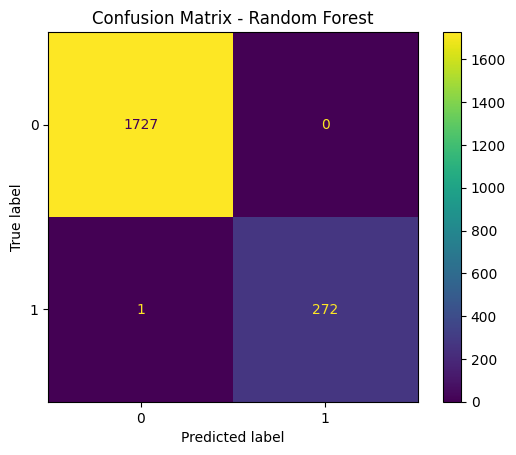

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

## 📌 Step 9: Feature Importance (Random Forest)

We use the feature importances generated by the Random Forest model to identify which variables contribute most to predicting intern performance. This helps mentors focus on the most influential performance factors.


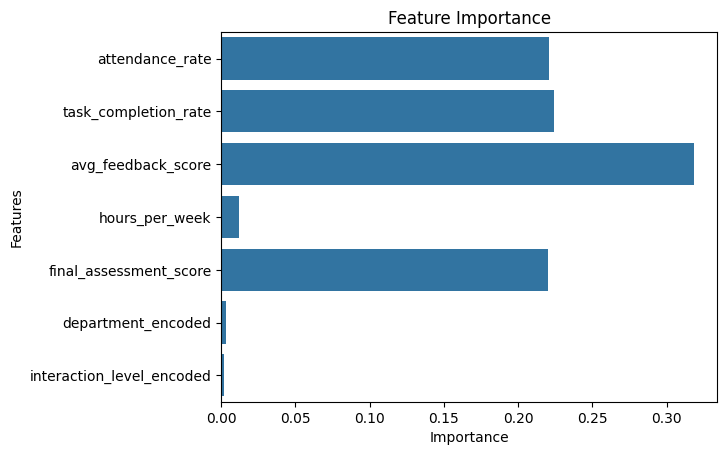

In [ ]:
import seaborn as sns

importances = rf.feature_importances_
feature_names = features

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

✅ **End of Notebook**

# 📦 Step 1: Load the Trained Model and Scaler
This step loads:
- **`intern_performance_model.pkl`** → the machine learning model we trained earlier.
- **`intern_scaler.pkl`** → the StandardScaler used to normalize the features during training.

We load these so we can preprocess and predict on the new intern data in exactly the same way as the training phase.


In [36]:
import joblib

# Load trained model and scaler
model = joblib.load("intern_performance_model.pkl")
scaler = joblib.load("intern_scaler.pkl")


# 📦 Step 2: Load and Preview New Intern Data
In this step:
- We load the **new test dataset** (`Test_data.xlsx`), which contains details of interns whose performance we want to predict.
- We **preview the first few rows** to make sure the file loaded correctly and has the expected columns.


In [37]:
import pandas as pd

# Load new intern data (you uploaded this earlier)
new_data = pd.read_excel("/content/drive/MyDrive/hammad ds/Test_data.xlsx")

# Preview to confirm
print(new_data.head())


  intern_id department  attendance_rate  task_completion_rate  \
0  INT10001       Tech               90                    85   
1  INT10002         HR               70                    60   
2  INT10003  Marketing               95                    90   
3  INT10004         HR               80                    70   

   avg_feedback_score  hours_per_week  final_assessment_score  \
0                 4.2              38                      80   
1                 3.0              30                      65   
2                 4.8              40                      95   
3                 3.0              38                      70   

  interaction_level  
0              High  
1            Medium  
2              High  
3            Medium  


# 📦 Step 3: Preprocess Data and Make Predictions
Here’s what we do in this step:
1. Save `intern_id` separately so we can show it in the final results.
2. Encode the categorical columns:
   - **`department`** → becomes `department_encoded`
   - **`interaction_level`** → becomes `interaction_level_encoded`
3. Drop the original text columns and keep only numeric features.
4. Arrange columns in the same order used during training.
5. Handle missing values (forward fill, as in training).
6. Apply scaling using the trained `scaler`.
7. Predict performance using the trained `model`.
8. Map the numeric prediction (`0` or `1`) to human-readable labels.
9. Display a results table with `Intern ID` and predicted performance.


In [38]:
import pandas as pd
import joblib

# Load model and scaler
model = joblib.load("intern_performance_model.pkl")
scaler = joblib.load("intern_scaler.pkl")

# Load new test data
new_data = pd.read_excel("/content/drive/MyDrive/hammad ds/Test_data.xlsx")

# Save intern IDs
intern_ids = new_data['intern_id']

# Encode categorical features
new_data['department_encoded'] = new_data['department'].astype('category').cat.codes
new_data['interaction_level_encoded'] = new_data['interaction_level'].astype('category').cat.codes

# Drop original non-numeric columns
features = new_data.drop(columns=['intern_id', 'department', 'interaction_level'])

# Reorder columns if needed (optional but safer if training order matters)
expected_columns = [
    'attendance_rate',
    'task_completion_rate',
    'avg_feedback_score',
    'hours_per_week',
    'final_assessment_score',
    'department_encoded',
    'interaction_level_encoded'
]
features = features[expected_columns]

# Handle missing values
features = features.ffill()

# Scale
scaled_features = scaler.transform(features)

# Predict
predictions = model.predict(scaled_features)

# Map results
label_map = {1: 'High Performer', 0: 'Not High Performer'}
predicted_labels = [label_map[p] for p in predictions]

# Combine results
result_df = pd.DataFrame({
    'Intern ID': intern_ids,
    'Predicted Performance': predicted_labels
})

# Show
print(result_df)

# Optional: Save to file
# result_df.to_excel("intern_predictions.xlsx", index=False)


  Intern ID Predicted Performance
0  INT10001        High Performer
1  INT10002    Not High Performer
2  INT10003        High Performer
3  INT10004    Not High Performer


In [40]:
pip install streamlit pandas numpy joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00
